# Deep Learning Project 
# Potato Disease Classification 
### By Krishna Narwade
### Enrollment Number : 943711

In [1]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Data Loading and Preprocessing 

In [2]:
Image_size = 256
Batch_size = 32 ## 32 Batches 
Channels = 3

In [3]:
## Creating a TF dataset 
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        "PlantVillage",
        shuffle= True,
        image_size = (Image_size,Image_size),
        batch_size = Batch_size)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names 
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
n_classes = len(class_names)

In [6]:
len(dataset)

68

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 2 2 1 1 1 1 0 1 2 1 0 1 1 1 0]


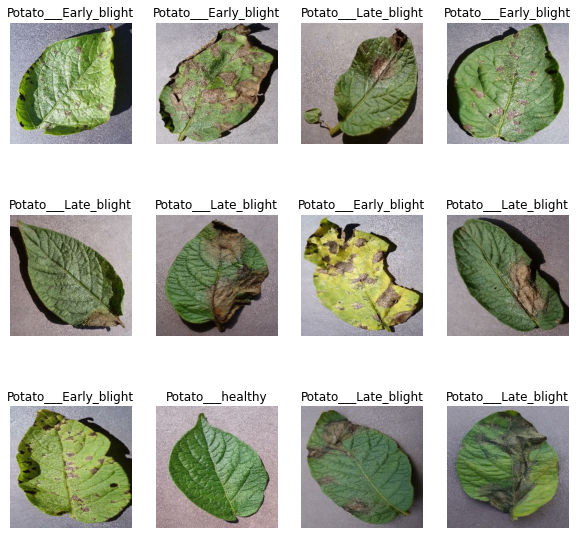

In [8]:
plt.figure(figsize= (10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
len(dataset)

68

In [11]:
80% for traning 
20% for testing === 10% validation, 10% test

SyntaxError: invalid syntax (424138020.py, line 1)

In [11]:
train_size = 0.8
train = round(len(dataset)*train_size)

In [12]:
train_ds = dataset.take(train)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
val_size = 0.1
validation = round(len(dataset)*val_size)

In [15]:
val_ds = test_ds.take(validation)
len(val_ds)

7

In [16]:
## Creating a partition function which segeregatest the data.
def get_dataset_partition_tf(ds, train_split = 0.8, val_split=0.1,test_split=0.1, shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size , seed = 12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds,test_ds

In [17]:
train_ds, val_ds,test_ds = get_dataset_partition_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8

In [21]:
## For Better Performance 

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)


In [22]:
##  rescaling the data 
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255) 
])

In [23]:
##Data Augmentation 
# In data Augmentation we create multiple variation of one image so that 
## model can understand the data in better way and can predict the values correctly 
data_augmnentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2), 
])

# Model Building 

### CNN 

In [25]:
input_shape = (Batch_size,Image_size,Image_size,Channels)
model = models.Sequential([
    resize_and_rescale,
    data_augmnentation,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation= 'softmax')
])

model.build(input_shape=input_shape)

In [30]:
EPOCHS = 50

In [31]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

### RSS

In [24]:
from tensorflow.keras import layers, models

def residual_block(x, filters, kernel_size=3, stride=1, use_shortcut=True):
    shortcut = x
    
    # First convolution layer
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Second convolution layer
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    # Add the shortcut (identity mapping) if specified
    if use_shortcut:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

input_shape = (Image_size, Image_size, Channels)
n_classes = 10  # Replace with the actual number of classes

inputs = layers.Input(shape=input_shape)
x = inputs

# Initial convolution layer
x = layers.Conv2D(64, (7, 7), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Residual blocks
num_blocks = [2, 2, 2, 2]  
num_filters = [64, 128, 256, 512]   

for stage in range(4):
    for block in range(num_blocks[stage]):
        if stage > 0 and block == 0:
            # Downsample at the beginning of each stage (except the first)
            x = residual_block(x, filters=num_filters[stage], stride=2)
        else:
            x = residual_block(x, filters=num_filters[stage], stride=1)

# Global average pooling
x = layers.GlobalAveragePooling2D()(x)

# Fully connected layers
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(n_classes, activation='softmax')(x)

model = models.Model(inputs, output)

# Optional: You can add data augmentation and rescaling as preprocessing steps before training


In [25]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy']
)

In [26]:
EPOCHS = 20

In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds)

Epoch 1/20
54/54 [==============================] - 230s 4s/step - loss: 0.4847 - accuracy: 0.8565 - val_loss: 2219.8003 - val_accuracy: 0.4010
Epoch 2/20
54/54 [==============================] - 216s 4s/step - loss: 0.1984 - accuracy: 0.9317 - val_loss: 251.5875 - val_accuracy: 0.4010
Epoch 3/20
54/54 [==============================] - 202s 4s/step - loss: 0.1299 - accuracy: 0.9537 - val_loss: 67.4459 - val_accuracy: 0.4010
Epoch 4/20
54/54 [==============================] - 224s 4s/step - loss: 0.1153 - accuracy: 0.9601 - val_loss: 67.2062 - val_accuracy: 0.4010
Epoch 5/20
54/54 [==============================] - 207s 4s/step - loss: 0.0947 - accuracy: 0.9653 - val_loss: 2.8105 - val_accuracy: 0.6094
Epoch 6/20
54/54 [==============================] - 228s 4s/step - loss: 0.0814 - accuracy: 0.9757 - val_loss: 3.2386 - val_accuracy: 0.5781
Epoch 7/20
54/54 [==============================] - 207s 4s/step - loss: 0.0744 - accuracy: 0.9751 - val_loss: 5.8927 - val_accuracy: 0.4531
Epoch 

In [28]:
### RSS Accuarcy 
scores = model.evaluate(test_ds)

8/8 [==============================] - 10s 728ms/step - loss: 2.5807 - accuracy: 0.6484


In [30]:
### CNN Accuarcy 
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 263ms/step - loss: 0.1227 - accuracy: 0.9570


In [31]:
scores

[0.12271629273891449, 0.95703125]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

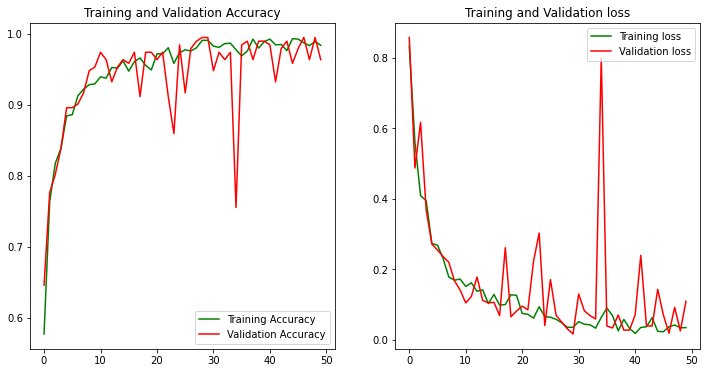

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy',color='g')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy',color='r')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss',color='g')
plt.plot(range(EPOCHS),val_loss,label='Validation loss',color='r')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')


In [ ]:

### CNN Accuarcy 
scores = model.evaluate(test_ds)

In [37]:
import numpy as np

first image to predict
first image's actual label: Potato___Early_blight
1/1 [==============================] - 0s 407ms/step
Predicted label: Potato___Early_blight


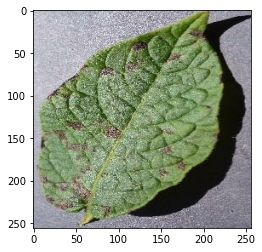

In [38]:
for image_batch, labels_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [39]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 23ms/step


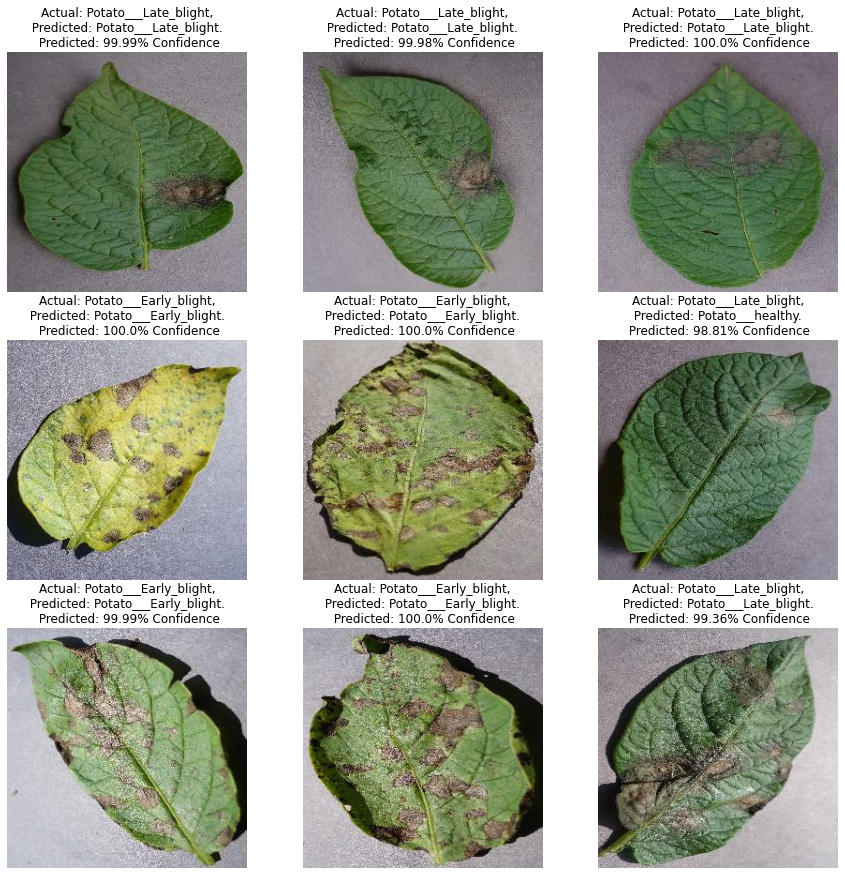

In [42]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}. \n Predicted: {confidence}% Confidence")
        plt.axis("off")

8/8 [==============================] - 7s 807ms/step - loss: 0.1227 - accuracy: 0.9570


In [44]:
model_version =1
model.save(f"C:/Users/Krishna Narwade/Potato Disease Classification/Models/")

INFO:tensorflow:Assets written to: C:/Users/Krishna Narwade/Potato Disease Classification/Models/assets


INFO:tensorflow:Assets written to: C:/Users/Krishna Narwade/Potato Disease Classification/Models/assets
